In [1]:
#Gerekli Kütüphanelerin İmport Edilmesi

import numpy as np # linear cebir işleri için
import pandas as pd # Veri işlemek için

#Görselleştirme - Grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Makine Öğrenmesi 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

#Sistem 
import os
import warnings

#Uyarıları kapatmak için 
warnings.filterwarnings('ignore')
print(os.listdir("../celik_kusurlarinin_siniflandirilmasi/veri"))

['faults.csv']


# Veri Seti Hakkında Bilgi

Bu veri seti, Semeion, İletişim Bilimleri Araştırma Merkezi tarafından yapılan araştırmalardan elde edilmiştir.. Araştırmanın asıl amacı, paslanmaz çelik plakalardaki yüzey kusurlarının tipini altı tip olası kusur (artı “diğer”) ile doğru bir şekilde sınıflandırmaktı. Özellik vektörü, kusurun geometrik şeklini ve taslağını yaklaşık olarak tanımlayan 27 özellikten oluşturulmuştur. Araştırma öyküsüne göre, Semeion bu görev için Centro Sviluppo Materiali (İtalya) kurumu tarafından görevlendirilmiştir ve bu nedenle özellik vektörleri olarak kullanılan 27 özelliğin niteliği veya 6 sınıf kusur tipi hakkında ayrıntılı bilgi vermek mümkün değildir.

-Veri setinde 34 özellik vardır. İlk 27 özellik, görüntülerde görülen bir çeşit çelik levha hatasını içerir. Son 7 sütun, kodlanmış sınıflardır, yani plaka arızası "Stains" olarak sınıflandırılırsa, o sütunda 1 ve diğer sütunlarda 0 olur. Yani son 7 sınıf özellik vektörünün etiketidir. Son yedi özellik şöyledir; Pastry Z_Scratch K_Scatch Stains Dirtiness Bumps Other_Faults

- Veri Setinin Linki : https://www.kaggle.com/uciml/faulty-steel-plates

In [2]:
data=pd.read_csv("../celik_kusurlarinin_siniflandirilmasi/veri/faults.csv")
df = data.copy()
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [4]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [5]:
df.shape

(1941, 34)

# Veri Seti Değerlendirme

Yukarıda yer alan bilglere bakarak veri seti hakkında şunları söylebiliriz:

-Veri seti 1941 örnekten oluşuyor.

-Eksik veri yok.

-Tüm veriler sayısaldır.(int ve float)

-Son yedi sütun etiket sütunlarıdır.

# Kusur Sınıflarını Tek Değişkende Toplama

'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps' ve 'Other_Faults' sütunları, örneğe ait sınıfları tutmaktadır. Bu etiket sütunlarını 'sinif' sütunu altında toplayalım (Tahmini yapabilmek için)

In [6]:
#Kusur sınıfını gösteren sütünlar (son 7 sutun)
etiket_sinifi=df.columns.values[-7:]

#Kusur sınıfını gösteren sütünlar 'target' sütünu altında toplanıyor
#axis = 1 satır işlemi yapmak için axis = 0 sütün işlemi yapmak için kullanılır.
# idxmax, Maksimum değerin satır etiketini döndürür.
hedef=(df.iloc[:,-7:]==1).idxmax(1) 

#Kusur sınıfını gösteren sütünlar veri setinden çıkartılır
df=df.drop(etiket_sinifi,axis=1)

#Oluşturulan target sınıfı veri setine ekleniyor
df['sinif']=hedef

In [7]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,sinif
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [8]:
df.shape #değişken sayısı 28' e düştü (7 sutun tek değişkende topladık.)

(1941, 28)

In [9]:
df.describe().T #veri setinin istatiksel özellikleri

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


In [10]:
df['sinif'].describe() #hedef değişkenin (sinif) istatistiksel bilgileri

count             1941
unique               7
top       Other_Faults
freq               673
Name: sinif, dtype: object

In [11]:
print(df['sinif'].value_counts()) # hedef değişkendeki sınıf içindeki örnek sayıları

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: sinif, dtype: int64


# Grafiksel Değerlendirmeler

### a) Hedef değişkenin sınıf içindeki örnek sayıları

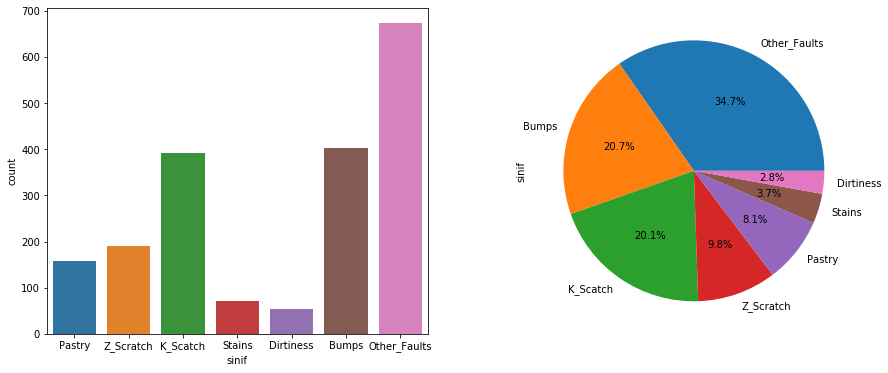

In [12]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='sinif', data=df, ax=ax[0])
df['sinif'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

grafiklerde de görüldüğü üzere veri dengesiz dağılımlıdır çünkü bazı sınıflar diğer sınıflardan çok daha fazla örnek içermektedir. Bu gibi veri setlerinde daha iyi sonuc elde etmek için test ve train setini ayırırken sınıfları eşit oranda bölmemiz gerekmektedir.

### b) maximum parlaklık değerinini dağılımı

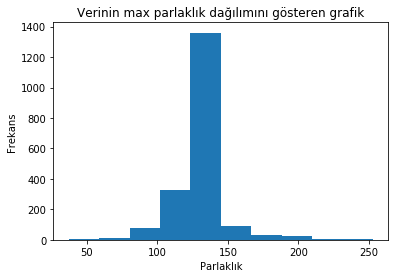

In [13]:
import matplotlib.pyplot as plt
df['Maximum_of_Luminosity'].plot.hist(title = "Verinin max parlaklık dağılımını gösteren grafik");
plt.xlabel('Parlaklık');
plt.ylabel('Frekans');

### c) Max parlakıklık değerinin 100 den büyük 150 den küçük olduğu durumda sinif değişkeninin gözlem sayıları

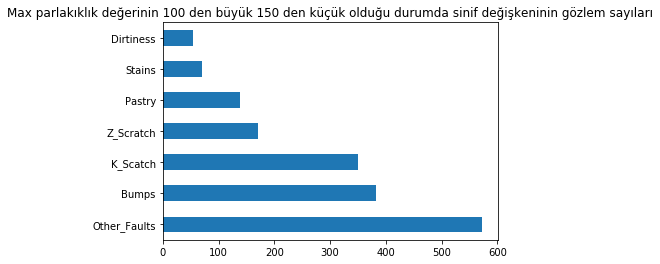

In [14]:
(df[(df['Maximum_of_Luminosity'] < 150) & (df['Maximum_of_Luminosity'] > 100)]['sinif']
 .value_counts()
 .plot.barh()
 .set_title('Max parlakıklık değerinin 100 den büyük 150 den küçük olduğu durumda sinif değişkeninin gözlem sayıları'));

# Standartlaştırma ve Label Encoder

verileri makine öğrenmesi algoritmalarına sokabilmemiz için standartlaştırma yapmamız ve sinif değişkenini sayısal olarak ifade etmemiz gerekiyor. 

In [15]:
lbe = preprocessing.LabelEncoder()

In [16]:
df["sinif"] = lbe.fit_transform(df["sinif"])

In [17]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,sinif
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,4


In [18]:
#bagimli ve bağimsiz değişkenleri ayırıyoruz.
y = df["sinif"] 
X = df.drop(["sinif"], axis = 1)

In [19]:
#bağımsız değişkenleri standartlaştırıyoruz.
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
#standartlaştırma sonrası bozulan X leri DataFrame e çeviriyoruz
X = pd.DataFrame(X, columns = df.columns.values[0:27])

# Test-Train Ayırma İşlemleri

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    stratify=y,
                                                    random_state = 42)

sınıf oranları eşit olsun diye stratify argümanını 'y' olarak giriyoruz.

In [22]:
#bu fonksiyon konfüzyon matrisi ni çizer ve sınıflandırma raporunu yazar
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d") 
    plt.title("Konfüzyon Matrisi")
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Değerler')
    plt.show()
    print('Sınıflandırma Raporu: \n',classification_report(y_test,y_pred))

# 1) Lojistik Regresyon

In [23]:
loj = LogisticRegression(solver = "newton-cg", multi_class = "multinomial")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = loj_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.7186963979416809

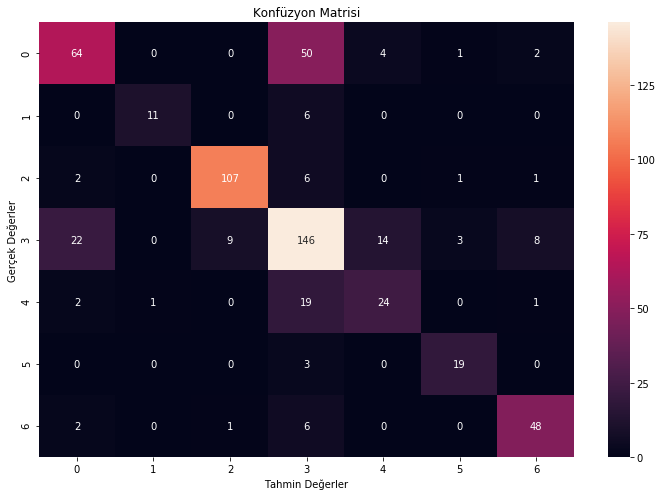

Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.70      0.53      0.60       121
           1       0.92      0.65      0.76        17
           2       0.91      0.91      0.91       117
           3       0.62      0.72      0.67       202
           4       0.57      0.51      0.54        47
           5       0.79      0.86      0.83        22
           6       0.80      0.84      0.82        57

    accuracy                           0.72       583
   macro avg       0.76      0.72      0.73       583
weighted avg       0.72      0.72      0.72       583



In [26]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)

# 2) SVM

In [27]:
svm_model = SVC(kernel = "rbf", C = 10, gamma = 0.1).fit(X_train, y_train)

In [28]:
y_pred = svm_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.7598627787307033

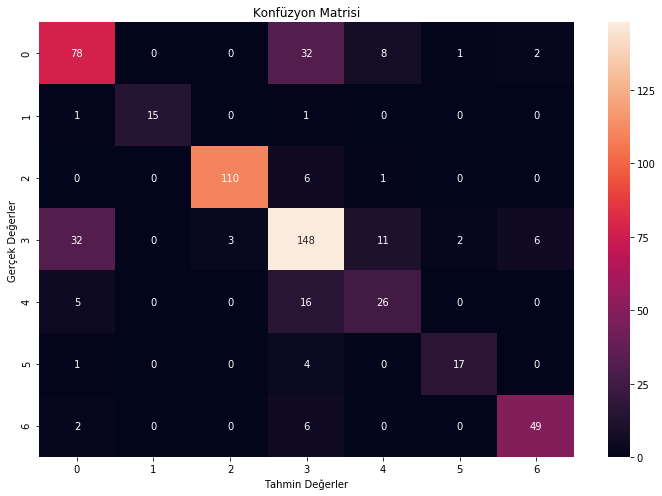

Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       121
           1       1.00      0.88      0.94        17
           2       0.97      0.94      0.96       117
           3       0.69      0.73      0.71       202
           4       0.57      0.55      0.56        47
           5       0.85      0.77      0.81        22
           6       0.86      0.86      0.86        57

    accuracy                           0.76       583
   macro avg       0.80      0.77      0.78       583
weighted avg       0.76      0.76      0.76       583



In [30]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)

# 3) KNN

In [31]:
knn = KNeighborsClassifier(11)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [32]:
y_pred = knn_model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.7221269296740995

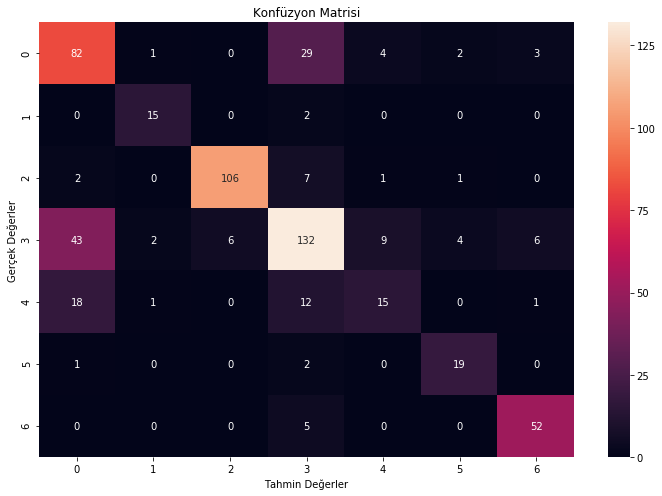

Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.56      0.68      0.61       121
           1       0.79      0.88      0.83        17
           2       0.95      0.91      0.93       117
           3       0.70      0.65      0.68       202
           4       0.52      0.32      0.39        47
           5       0.73      0.86      0.79        22
           6       0.84      0.91      0.87        57

    accuracy                           0.72       583
   macro avg       0.73      0.74      0.73       583
weighted avg       0.72      0.72      0.72       583



In [34]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)

# 4) Karar Ağaçları

In [35]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [36]:
y_pred = knn_model.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.7221269296740995

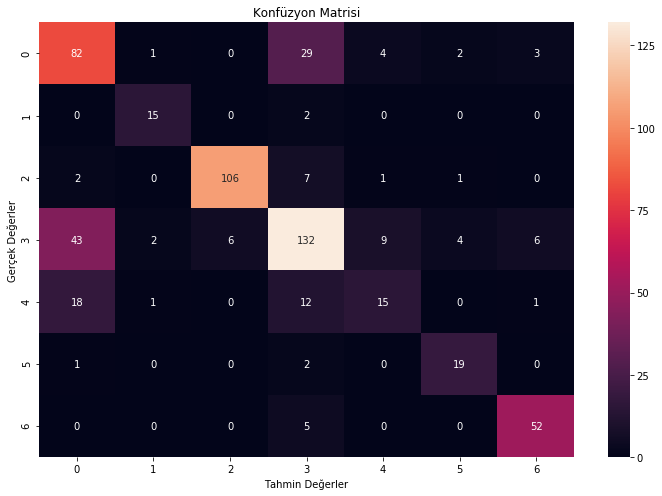

Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.56      0.68      0.61       121
           1       0.79      0.88      0.83        17
           2       0.95      0.91      0.93       117
           3       0.70      0.65      0.68       202
           4       0.52      0.32      0.39        47
           5       0.73      0.86      0.79        22
           6       0.84      0.91      0.87        57

    accuracy                           0.72       583
   macro avg       0.73      0.74      0.73       583
weighted avg       0.72      0.72      0.72       583



In [38]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)

# 5) YSA

In [39]:
mlpc = MLPClassifier().fit(X_train, y_train)

In [40]:
y_pred = mlpc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7632933104631218

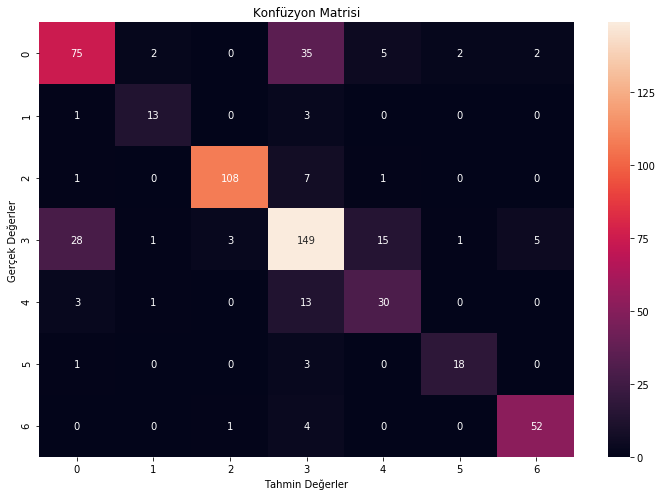

Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       121
           1       0.76      0.76      0.76        17
           2       0.96      0.92      0.94       117
           3       0.70      0.74      0.72       202
           4       0.59      0.64      0.61        47
           5       0.86      0.82      0.84        22
           6       0.88      0.91      0.90        57

    accuracy                           0.76       583
   macro avg       0.78      0.77      0.77       583
weighted avg       0.77      0.76      0.76       583



In [41]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)

# Sonuçların Karşılaştırılması

In [42]:
modeller = [
    loj_model,
    svm_model,
    knn_model,
    mlpc,
    cart_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 71.8696%
----------------------------
SVC:
Accuracy: 75.9863%
----------------------------
KNeighborsClassifier:
Accuracy: 72.2127%
----------------------------
MLPClassifier:
Accuracy: 76.3293%
----------------------------
DecisionTreeClassifier:
Accuracy: 69.2967%


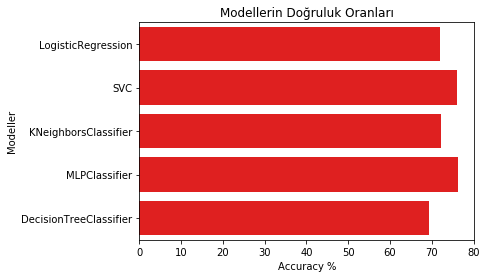

In [43]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');  